#IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

# for nicer plot fonts
sns.set(style="whitegrid")

#LOAD THE DATA and INITIAL INSPECTION

In [2]:
data_path = "../data/insurance_claims.txt"
df = pd.read_csv(data_path, sep="|")

print("Shape of dataset:", df.shape)
print("\nFirst 5 rows:")
display(df.head())

print("\nData Types:")
print(df.dtypes)

print("\nMissing Values:")
print(df.isnull().sum())
print(df.columns)


Shape of dataset: (1000098, 52)

First 5 rows:


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0



Data Types:
UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
NumberOfDoors  

CONVERT DATE COLUMN

In [3]:
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'], errors='coerce')
df['Month'] = df['TransactionMonth'].dt.to_period("M")
print(df['TransactionMonth'])
print(df['Month'])

0         2015-03-01
1         2015-05-01
2         2015-07-01
3         2015-05-01
4         2015-07-01
             ...    
1000093   2015-04-01
1000094   2015-06-01
1000095   2015-08-01
1000096   2014-07-01
1000097   2015-02-01
Name: TransactionMonth, Length: 1000098, dtype: datetime64[ns]
0          2015-03
1          2015-05
2          2015-07
3          2015-05
4          2015-07
            ...   
1000093    2015-04
1000094    2015-06
1000095    2015-08
1000096    2014-07
1000097    2015-02
Name: Month, Length: 1000098, dtype: period[M]


CREATE LOSS RATIO COLUMN

In [14]:
df['LossRatio'] = df['TotalClaims'] / df['TotalPremium']
df['LossRatio'] = df['LossRatio'].replace([np.inf, -np.inf], np.nan)  # Handle divide by zero, If TotalPremium = 0=> NaN
print(df[['TotalClaims', 'TotalPremium', 'LossRatio']].head())
df.to_csv("../data/insurance_claims_v2.txt", sep='\t', index=False)


   TotalClaims  TotalPremium  LossRatio
0          0.0     21.929825        0.0
1          0.0     21.929825        0.0
2          0.0      0.000000        NaN
3          0.0    512.848070        0.0
4          0.0      0.000000        NaN


SUMMARY STATISTICS

In [5]:
display(df[['TotalPremium', 'TotalClaims', 'SumInsured', 'CustomValueEstimate', 'LossRatio']].describe())

# Variability of numeric features-- already included 
# numeric_features = ['TotalPremium', 'TotalClaims', 'SumInsured', 'CustomValueEstimate', 'LossRatio']
# variability = df[numeric_features].std()
# print("\nStandard Deviation of Numeric Features:")
# print(variability)
print("\nUnique values per categorical column:")
print(df.select_dtypes(include='object').nunique())


,TotalPremium,TotalClaims,SumInsured,CustomValueEstimate,LossRatio
count,1.000098e+06,1.000098e+06,1.000098e+06,2.204560e+05,618464.000000
mean,6.190550e+01,6.486119e+01,6.041727e+05,2.255311e+05,0.349885
std,2.302845e+02,2.384075e+03,1.508332e+06,5.645157e+05,9.286479
min,-7.825768e+02,-1.200241e+04,1.000000e-02,2.000000e+04,-18.700122
25%,0.000000e+00,0.000000e+00,5.000000e+03,1.350000e+05,0.000000
50%,2.178333e+00,0.000000e+00,7.500000e+03,2.200000e+05,0.000000
75%,2.192982e+01,0.000000e+00,2.500000e+05,2.800000e+05,0.000000
max,6.528260e+04,3.930921e+05,1.263620e+07,2.655000e+07,2553.600000



Unique values per categorical column:
Citizenship              4
LegalType                6
Title                    5
Language                 1
Bank                    11
AccountType              3
MaritalStatus            3
Gender                   3
Country                  1
Province                 9
MainCrestaZone          16
SubCrestaZone           45
ItemType                 1
VehicleType              5
make                    46
Model                  411
bodytype                13
VehicleIntroDate       174
AlarmImmobiliser         2
TrackingDevice           2
CapitalOutstanding    1011
NewVehicle               2
WrittenOff               2
Rebuilt                  2
Converted                2
CrossBorder              1
TermFrequency            2
ExcessSelected          13
CoverCategory           28
CoverType               22
CoverGroup              14
Section                  5
Product                  4
StatutoryClass           1
StatutoryRiskType        1
dtype: int64


UNIVARIATE ANALYSIS (DISTRIBUTIONS)

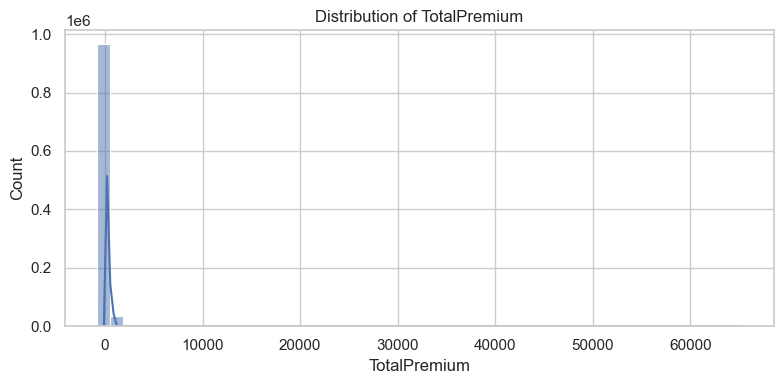

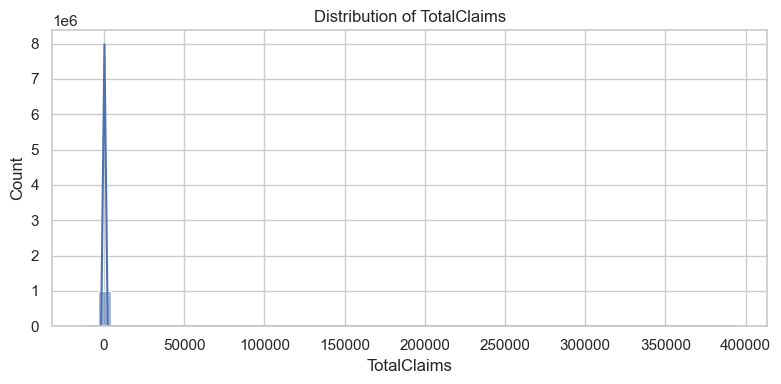

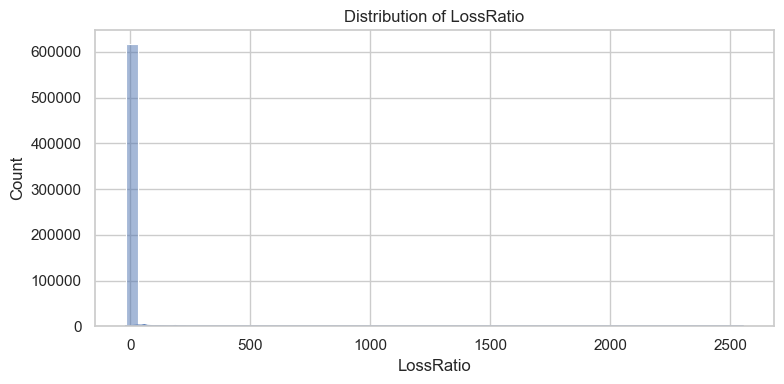

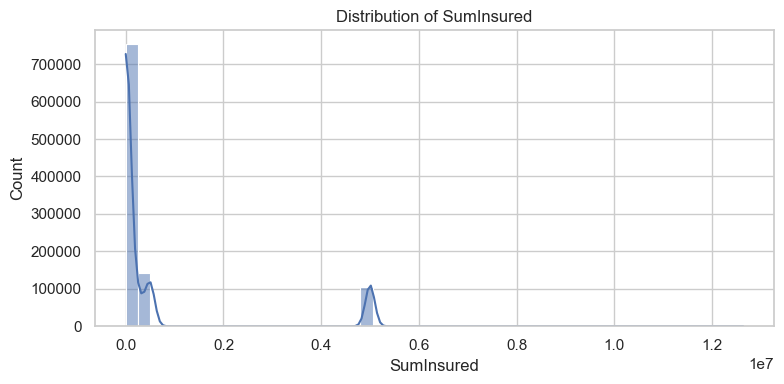

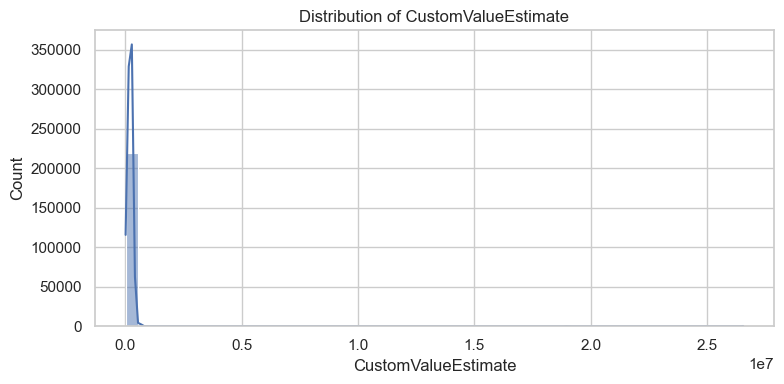

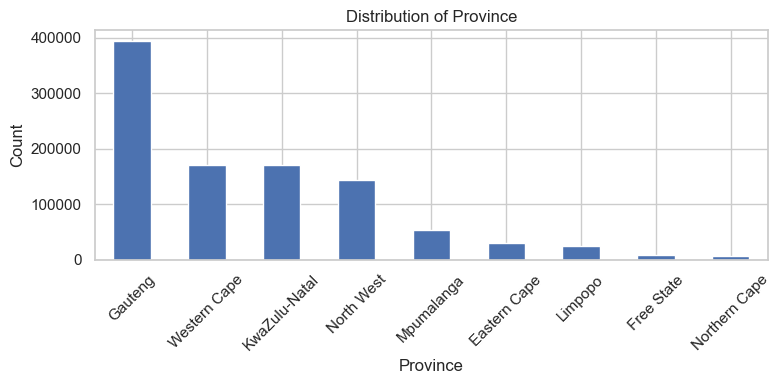

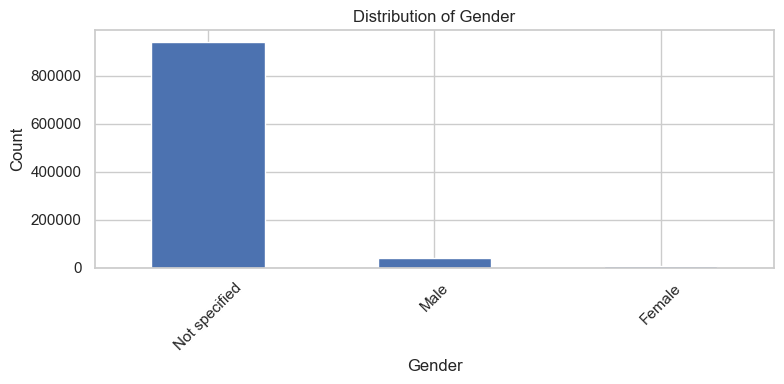

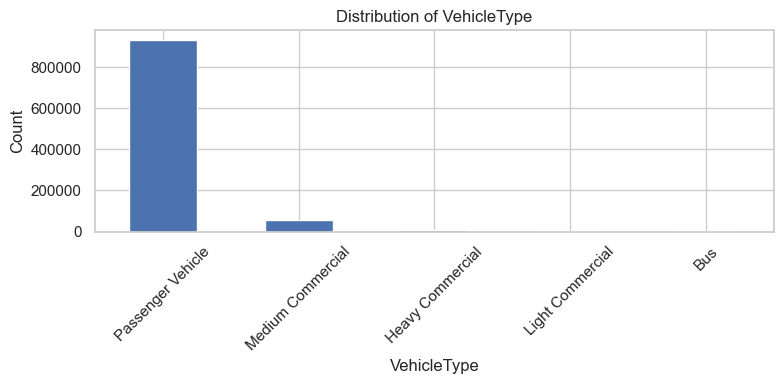

In [6]:
numeric_cols = ['TotalPremium', 'TotalClaims', 'LossRatio', 'SumInsured', 'CustomValueEstimate']
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=50)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

categorical_cols = ['Province', 'Gender', 'VehicleType']
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


OUTLIER DETECTION (BOXPLOTS)

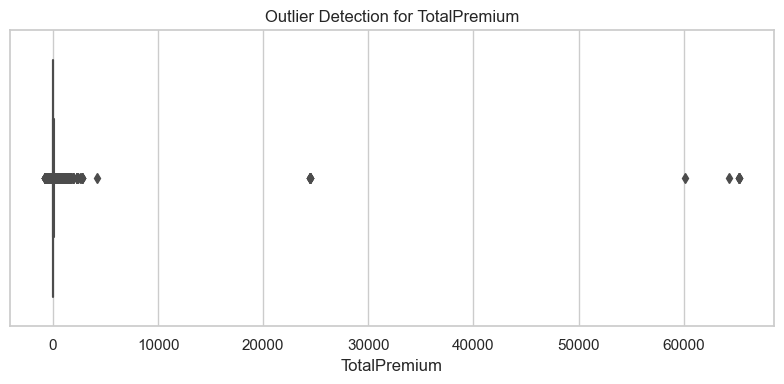

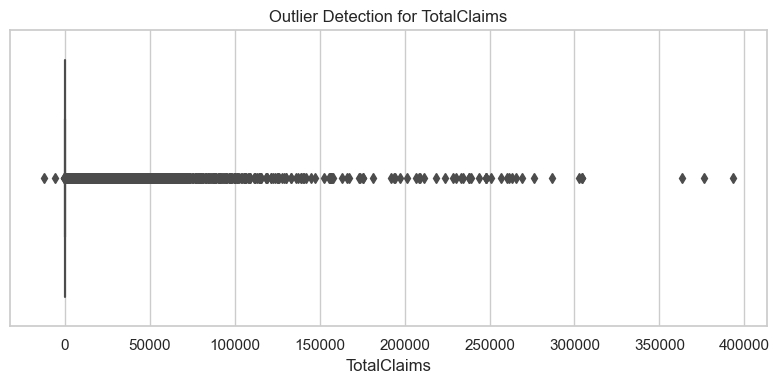

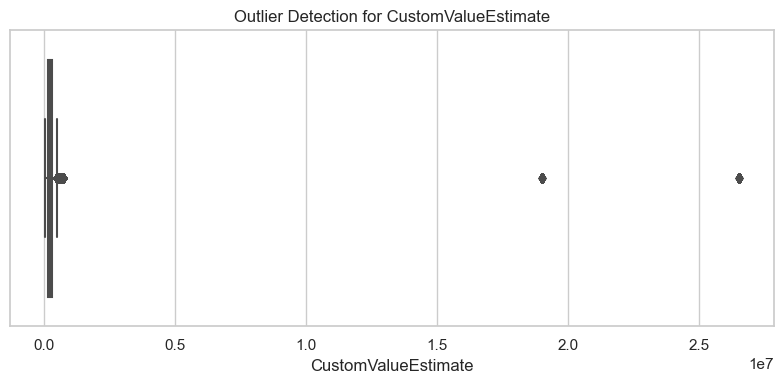

In [7]:
for col in ['TotalPremium', 'TotalClaims', 'CustomValueEstimate']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Outlier Detection for {col}')
    plt.tight_layout()
    plt.show()

TEMPORAL TRENDS

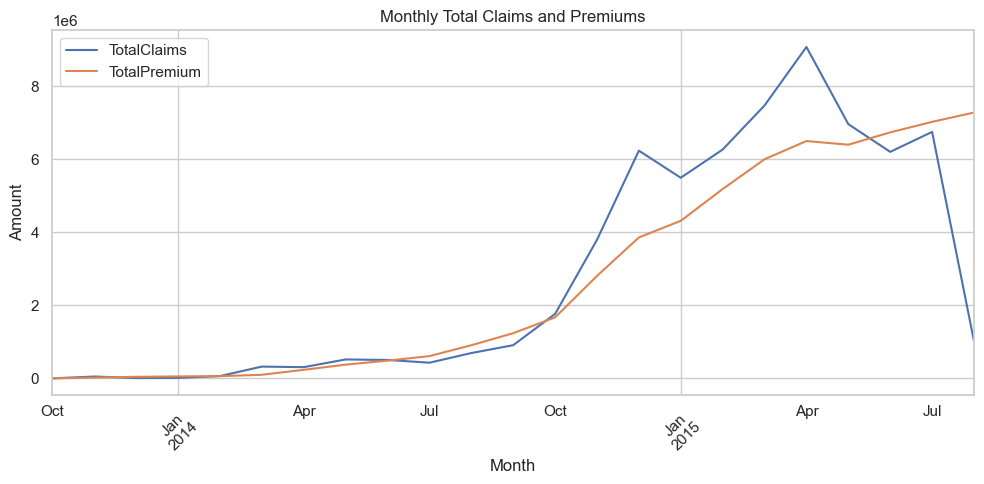

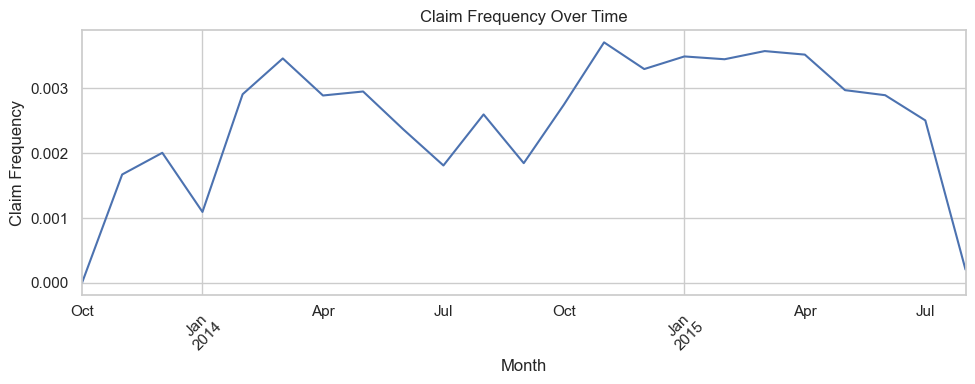

In [8]:
monthly = df.groupby('Month')[['TotalClaims', 'TotalPremium']].sum()
monthly.plot(figsize=(10, 5), title="Monthly Total Claims and Premiums")
plt.ylabel("Amount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#claim frequency
df['ClaimOccurred'] = df['TotalClaims'] > 0
monthly_freq = df.groupby('Month')['ClaimOccurred'].mean()
monthly_freq.plot(title='Claim Frequency Over Time', figsize=(10,4))
plt.ylabel('Claim Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


LOSS RATIO BY GROUP

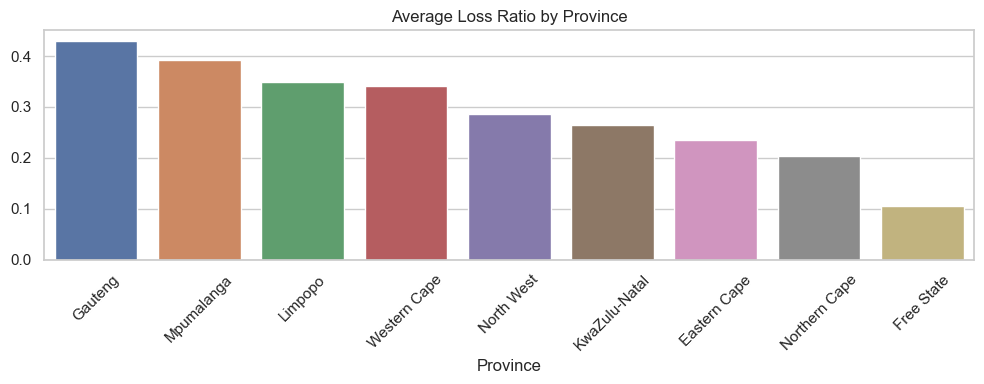

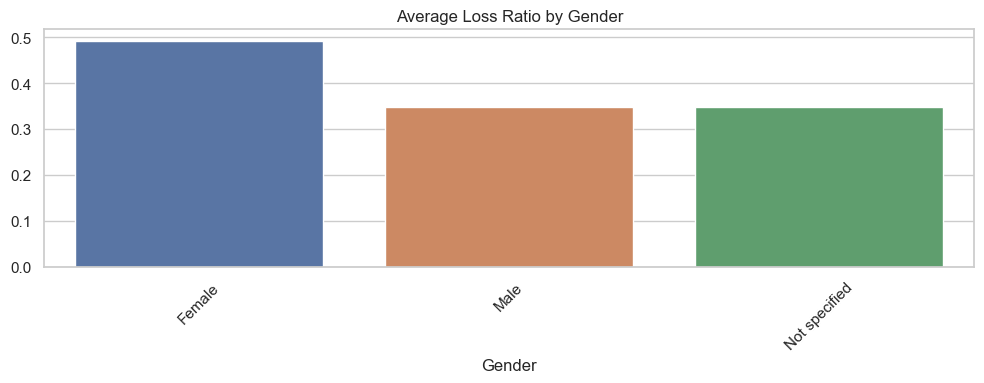

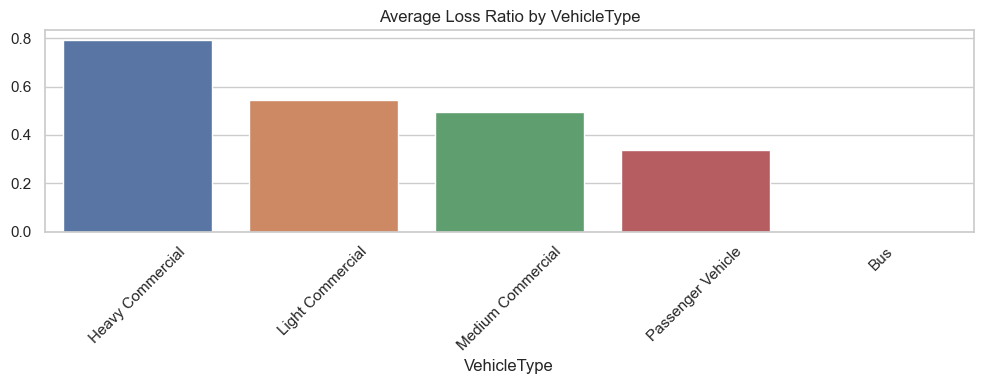

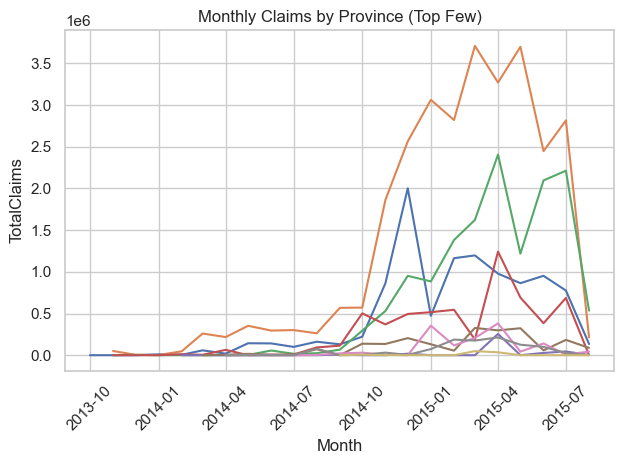

In [9]:
group_cols = ['Province', 'Gender', 'VehicleType']
for col in group_cols:
    plt.figure(figsize=(10, 4))
    group_data = df.groupby(col)['LossRatio'].mean().sort_values(ascending=False)
    sns.barplot(x=group_data.index, y=group_data.values)
    plt.title(f'Average Loss Ratio by {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


monthly_zip = df.groupby(['Month', 'Province'])[['TotalClaims', 'TotalPremium']].sum().reset_index()
monthly_zip['Month'] = monthly_zip['Month'].dt.to_timestamp()  #covertion of 'Month' from Period[M] to Timestamp

sns.lineplot(data=monthly_zip, x='Month', y='TotalClaims', hue='Province', legend=False)
plt.title('Monthly Claims by Province (Top Few)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


TOP VEHICLE MODELS BY CLAIMS

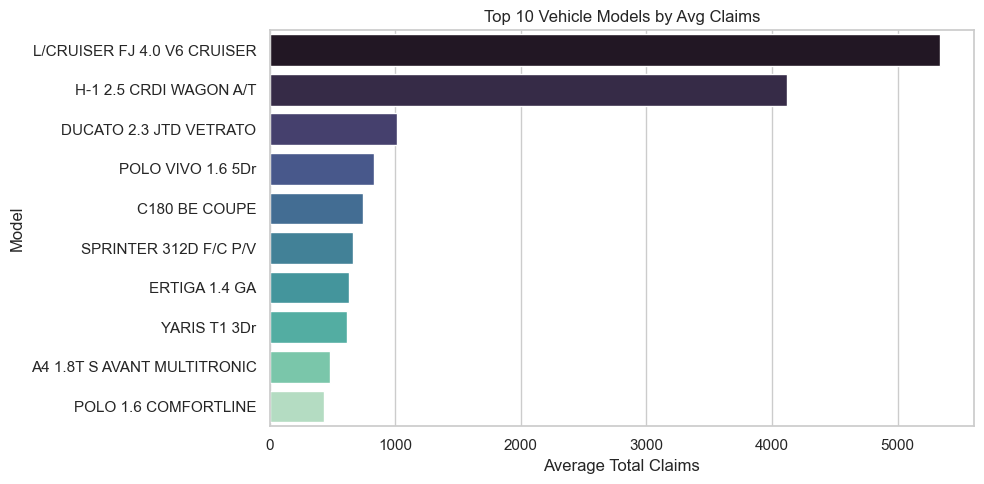

In [10]:
top_models = df.groupby('Model')['TotalClaims'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(y=top_models.index, x=top_models.values, palette="mako")
plt.title("Top 10 Vehicle Models by Avg Claims")
plt.xlabel("Average Total Claims")
plt.tight_layout()
plt.show()

CORRELATION HEATMAP

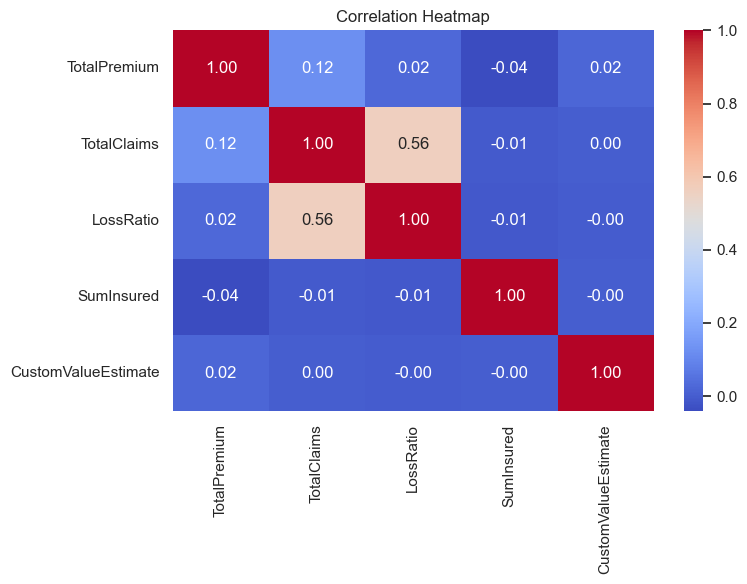

In [11]:
corr = df[numeric_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

#ADDITIONAL INSIGHTS

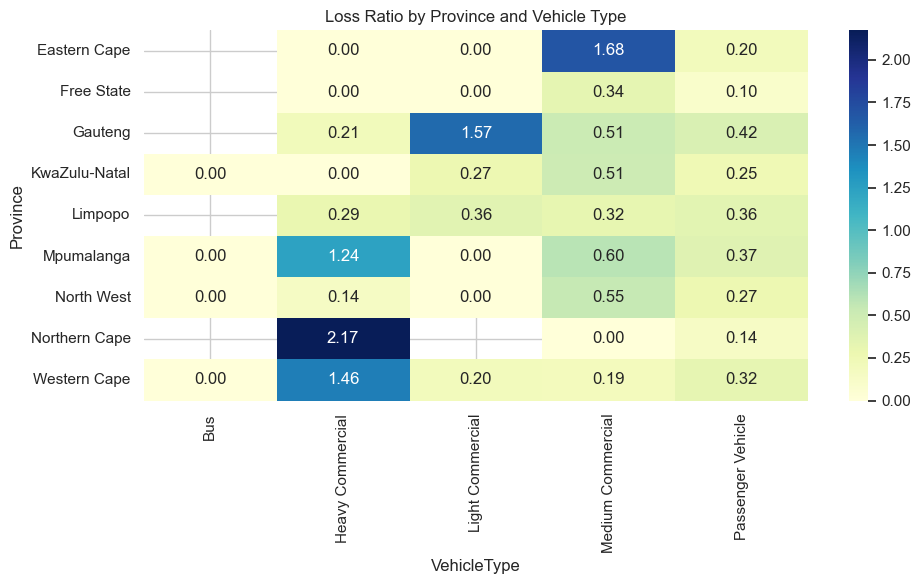

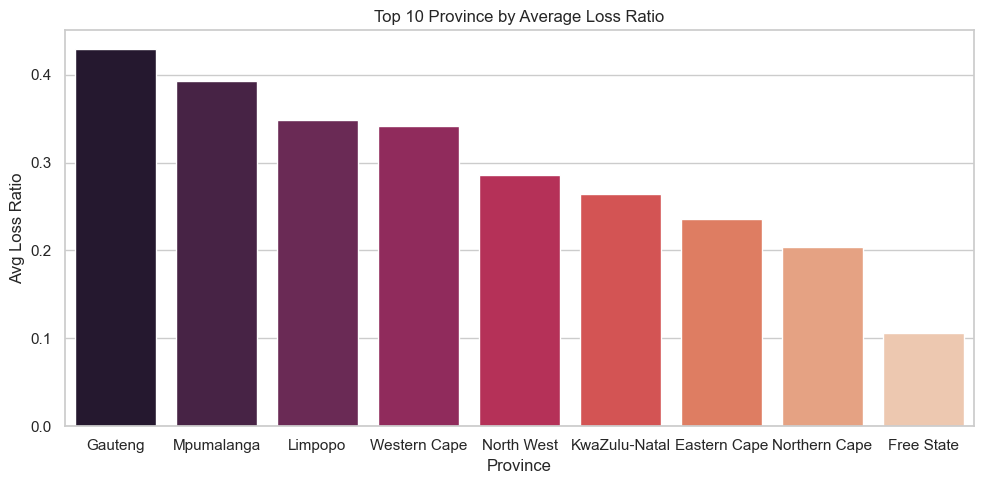

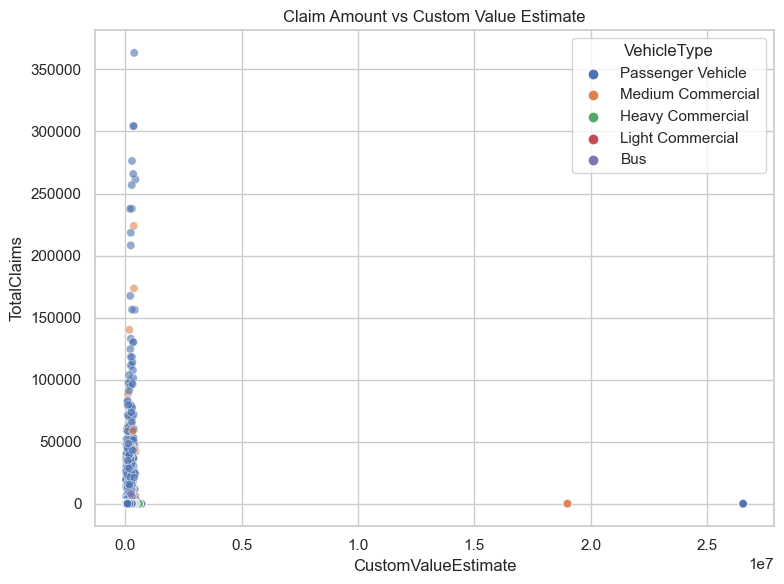

In [12]:
#Insight 1: Loss Ratio Heatmap by Province and VehicleType

pivot = df.pivot_table(index='Province', columns='VehicleType', values='LossRatio', aggfunc='mean')
plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Loss Ratio by Province and Vehicle Type")
plt.tight_layout()
plt.show()
#Insight 2: Top 10 Province by Loss Ratio

top_zips = df.groupby('Province')['LossRatio'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_zips.index, y=top_zips.values, palette="rocket")
plt.title("Top 10 Province by Average Loss Ratio")
plt.ylabel("Avg Loss Ratio")
plt.xlabel("Province")
plt.tight_layout()
plt.show()
#Insight 3: Custom Value vs. Claims — Risk Pattern

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='CustomValueEstimate', y='TotalClaims', hue='VehicleType', alpha=0.6)
plt.title("Claim Amount vs Custom Value Estimate")
plt.tight_layout()
plt.show()
